In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel('data.xlsx')

data.head()

,Married(per 1 thousand),Uneducated,Educated(bachelor's),Employment,Unemployment,Poverty Rate,Year,Country
0,8.2,NaN,25.6,64.4,NaN,11.3,2000,USA
1,8.2,14.8,26.2,63.7,NaN,11.7,2001,USA
2,8.0,14.6,26.7,62.7,NaN,12.1,2002,USA
3,7.7,14.4,27.2,62.3,NaN,12.5,2003,USA
4,7.8,14.2,27.7,62.3,5.5,12.7,2004,USA


In [ ]:
country = data['Country'].unique()
print(country)

['USA' 'Canada' 'Turkey' 'Germany' 'Spain']


In [ ]:
def replace_nulls_with_column_mean(df):
    for column in df.columns:
        if df[column].dtype in [np.float64, np.int64]:
            mean_value = df[column].mean(skipna=True)
            df[column].fillna(mean_value, inplace=True)
    return df

In [ ]:
data = replace_nulls_with_column_mean(data)

In [ ]:
data['Country'] = data['Country'].astype('category')

In [ ]:
data['Year'] = data['Year'].astype(int)

In [ ]:
data.set_index(['Year', 'Country'], inplace=True)

In [ ]:
data.head()

,,Married(per 1 thousand),Uneducated,Educated(bachelor's),Employment,Unemployment,Poverty Rate
Year,Country,,,,,,
2000,USA,8.2,10.41266,25.6,64.4,9.381212,11.3
2001,USA,8.2,14.80000,26.2,63.7,9.381212,11.7
2002,USA,8.0,14.60000,26.7,62.7,9.381212,12.1
2003,USA,7.7,14.40000,27.2,62.3,9.381212,12.5
2004,USA,7.8,14.20000,27.7,62.3,5.500000,12.7


In [ ]:
def country_stats(country):
    country_data = data.xs(country, level='Country')


    desc_stats = country_data.describe()


    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))


    country_data['Married(per 1 thousand)'].plot(ax=axes[0, 0], title=f'{country} - Marriage Rates Over Time')
    axes[0, 0].set_ylabel('Marriage Rate per 1,000 people')


    country_data["Educated(bachelor's)"].plot(ax=axes[0, 1], title=f'{country} - Education Levels (Percentage of Educated People)')
    axes[0, 1].set_ylabel('Percentage')

    country_data["Uneducated"].plot(ax=axes[1, 0], title=f'{country} - Uneducated Levels (Percentage of Uneducated People)')
    axes[1, 0].set_ylabel('Percentage')


    country_data['Employment'].plot(ax=axes[1, 1], title=f'{country} - Employment Rates Over Time')
    axes[1, 1].set_ylabel('Employment Rate (%)')


    country_data['Unemployment'].plot(ax=axes[2, 0], title=f'{country} - Unemployment Rates Over Time')
    axes[2, 0].set_ylabel('Unemployment Rate (%)')


    country_data['Poverty Rate'].plot(ax=axes[2, 1], title=f'{country} - Poverty Rates Over Time')
    axes[2, 1].set_ylabel('Poverty Rate (%)')



    plt.tight_layout()
    plt.show()

    return desc_stats


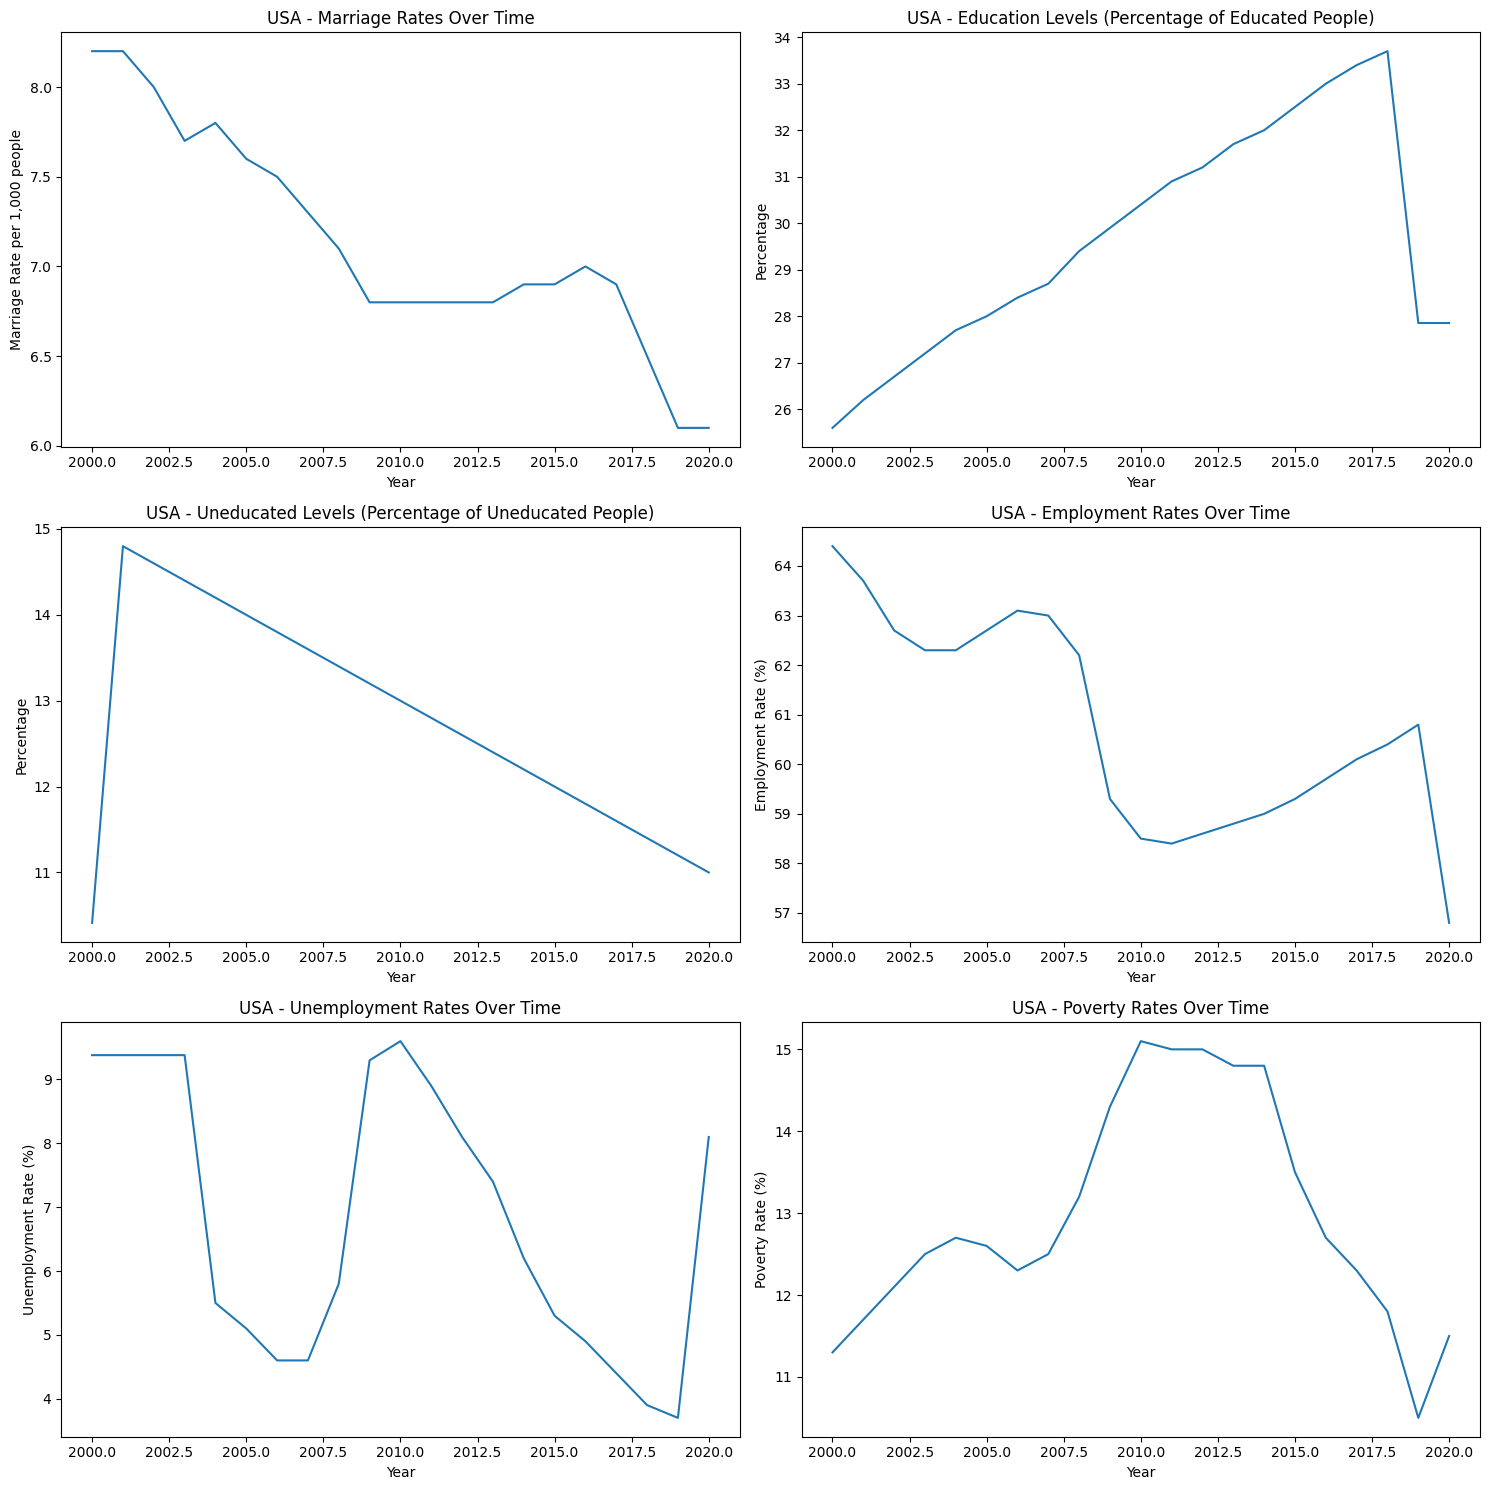

Statistics for USA:
       Married(per 1 thousand)  Uneducated  Educated(bachelor's)  Employment  \
count                21.000000   21.000000             21.000000   21.000000   
mean                  7.133333   12.781555             29.633794   60.766667   
std                   0.610191    1.274603              2.476158    2.128928   
min                   6.100000   10.412660             25.600000   56.800000   
25%                   6.800000   11.800000             27.854839   59.000000   
50%                   6.900000   12.800000             29.400000   60.400000   
75%                   7.600000   13.800000             31.700000   62.700000   
max                   8.200000   14.800000             33.700000   64.400000   

       Unemployment  Poverty Rate  
count     21.000000     21.000000  
mean       6.805945     12.961905  
std        2.169676      1.378215  
min        3.700000     10.500000  
25%        4.900000     12.100000  
50%        6.200000     12.600000  
75%    

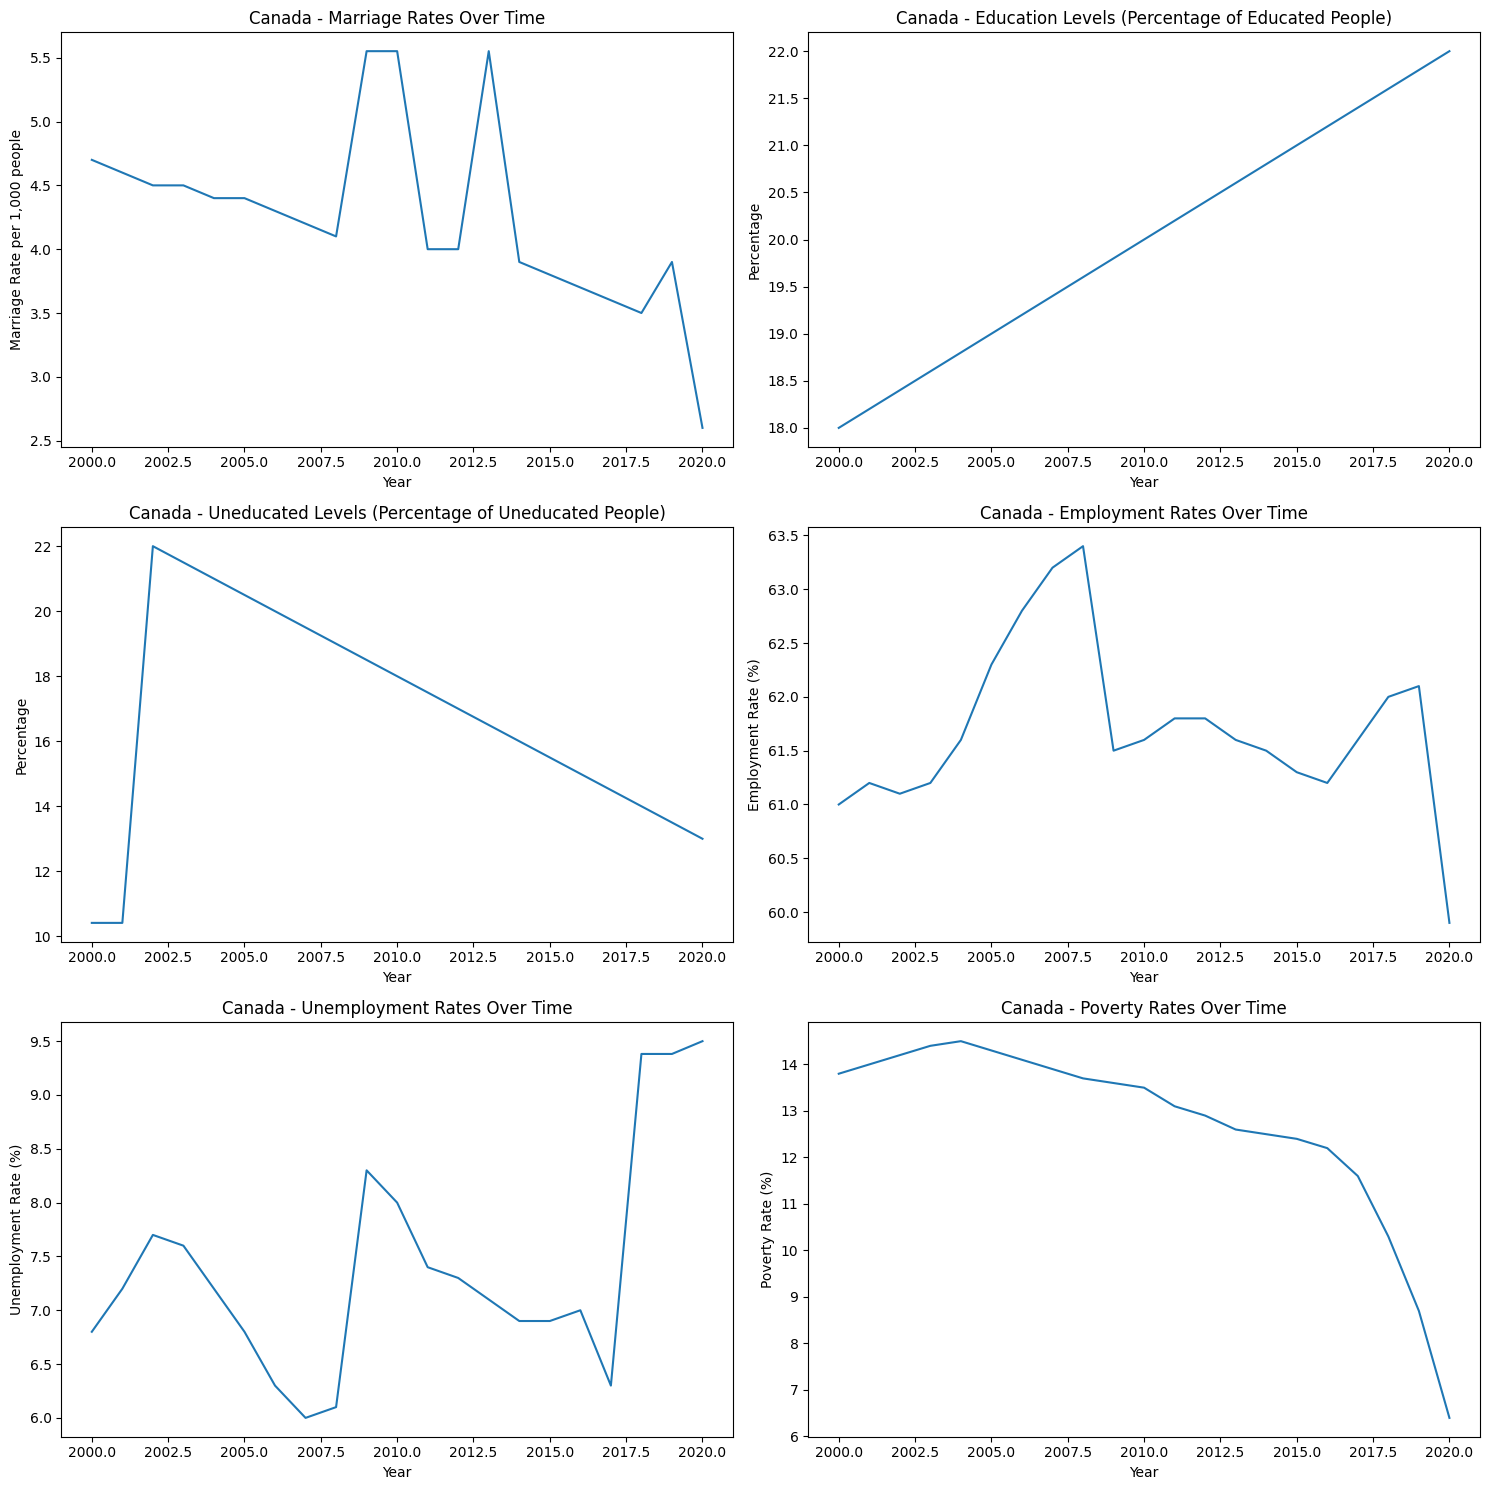

Statistics for Canada:
       Married(per 1 thousand)  Uneducated  Educated(bachelor's)  Employment  \
count                21.000000   21.000000             21.000000   21.000000   
mean                  4.254974   16.825015             20.000000   61.700000   
std                   0.713655    3.416088              1.240967    0.777817   
min                   2.600000   10.412660             18.000000   59.900000   
25%                   3.900000   14.500000             19.000000   61.200000   
50%                   4.200000   17.000000             20.000000   61.600000   
75%                   4.500000   19.500000             21.000000   62.000000   
max                   5.551485   22.000000             22.000000   63.400000   

       Unemployment  Poverty Rate  
count     21.000000     21.000000  
mean       7.388687     12.700000  
std        1.029265      2.036418  
min        6.000000      6.400000  
25%        6.800000     12.400000  
50%        7.200000     13.500000  
75% 

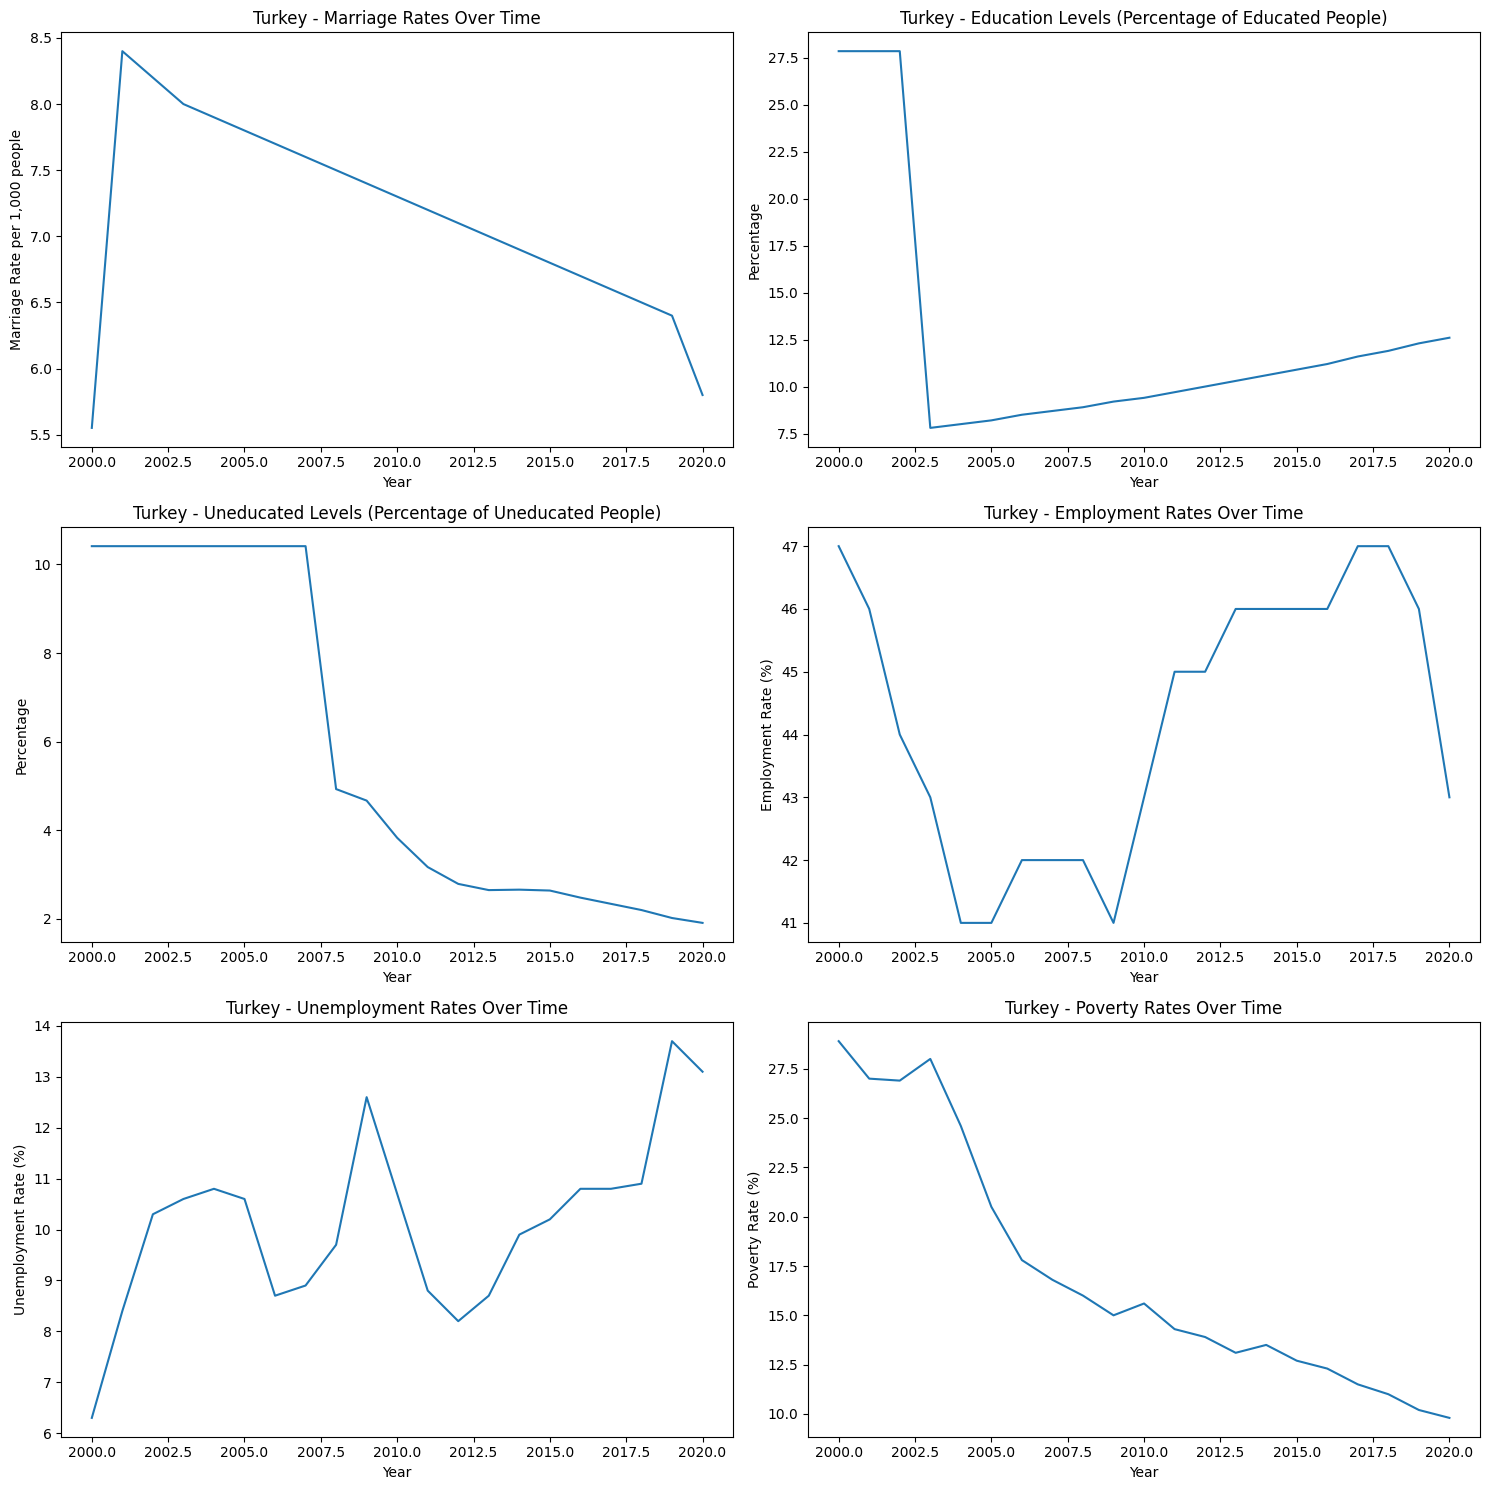

Statistics for Turkey:
       Married(per 1 thousand)  Uneducated  Educated(bachelor's)  Employment  \
count                21.000000   21.000000             21.000000   21.000000   
mean                  7.159595    5.790061             12.541167   44.238095   
std                   0.747105    3.789755              6.557506    2.165751   
min                   5.551485    1.910000              7.800000   41.000000   
25%                   6.700000    2.640000              8.900000   42.000000   
50%                   7.200000    3.830000             10.300000   45.000000   
75%                   7.700000   10.412660             11.900000   46.000000   
max                   8.400000   10.412660             27.854839   47.000000   

       Unemployment  Poverty Rate  
count     21.000000     21.000000  
mean      10.128571     17.114286  
std        1.723410      6.274017  
min        6.300000      9.800000  
25%        8.800000     12.700000  
50%       10.300000     15.000000  
75% 

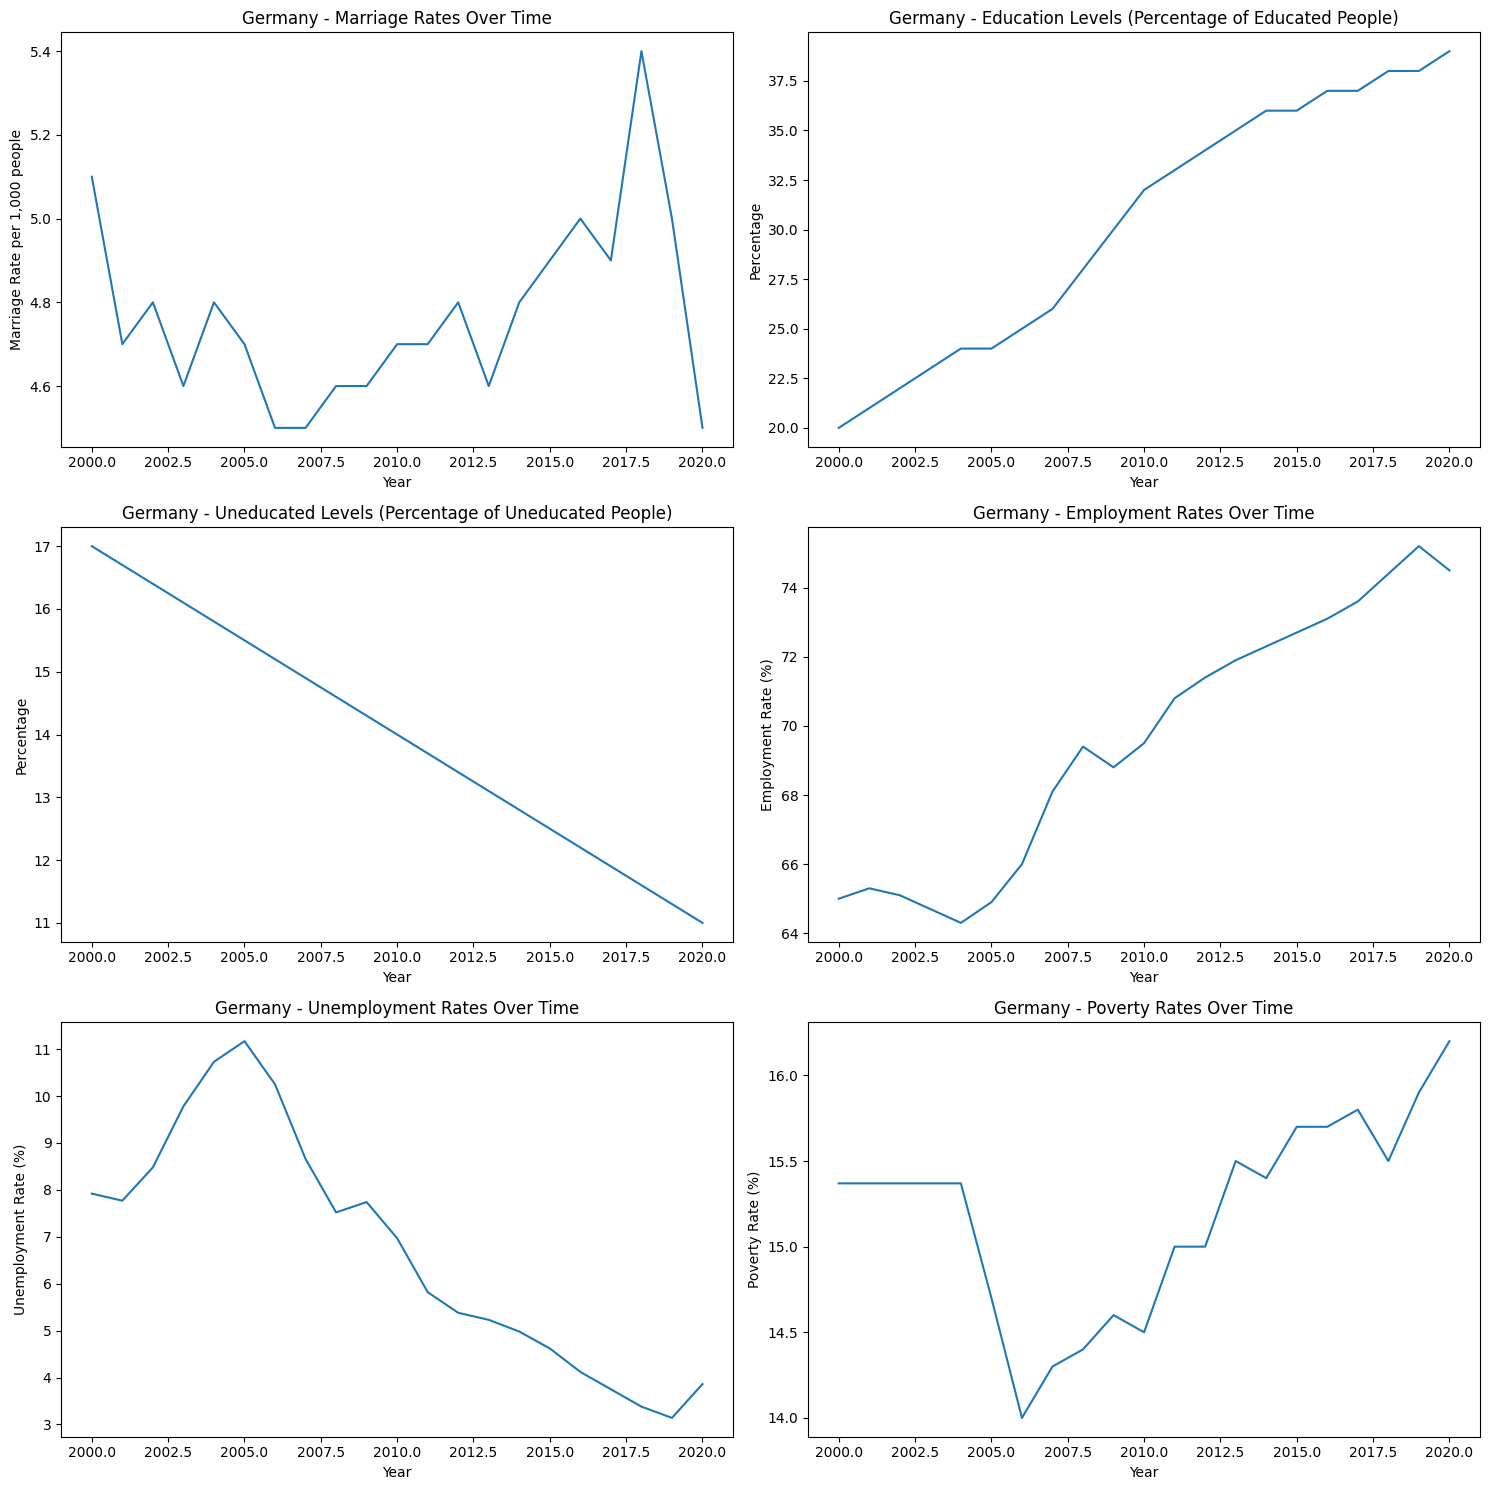

Statistics for Germany:
       Married(per 1 thousand)  Uneducated  Educated(bachelor's)  Employment  \
count                21.000000   21.000000             21.000000   21.000000   
mean                  4.771429   14.000000             30.380952   69.571429   
std                   0.223926    1.861451              6.484414    3.764989   
min                   4.500000   11.000000             20.000000   64.300000   
25%                   4.600000   12.500000             24.000000   65.300000   
50%                   4.700000   14.000000             32.000000   69.500000   
75%                   4.900000   15.500000             36.000000   72.700000   
max                   5.400000   17.000000             39.000000   75.200000   

       Unemployment  Poverty Rate  
count     21.000000     21.000000  
mean       6.727143     15.192754  
std        2.538193      0.582351  
min        3.140000     14.000000  
25%        4.620000     14.700000  
50%        6.970000     15.369565  
75%

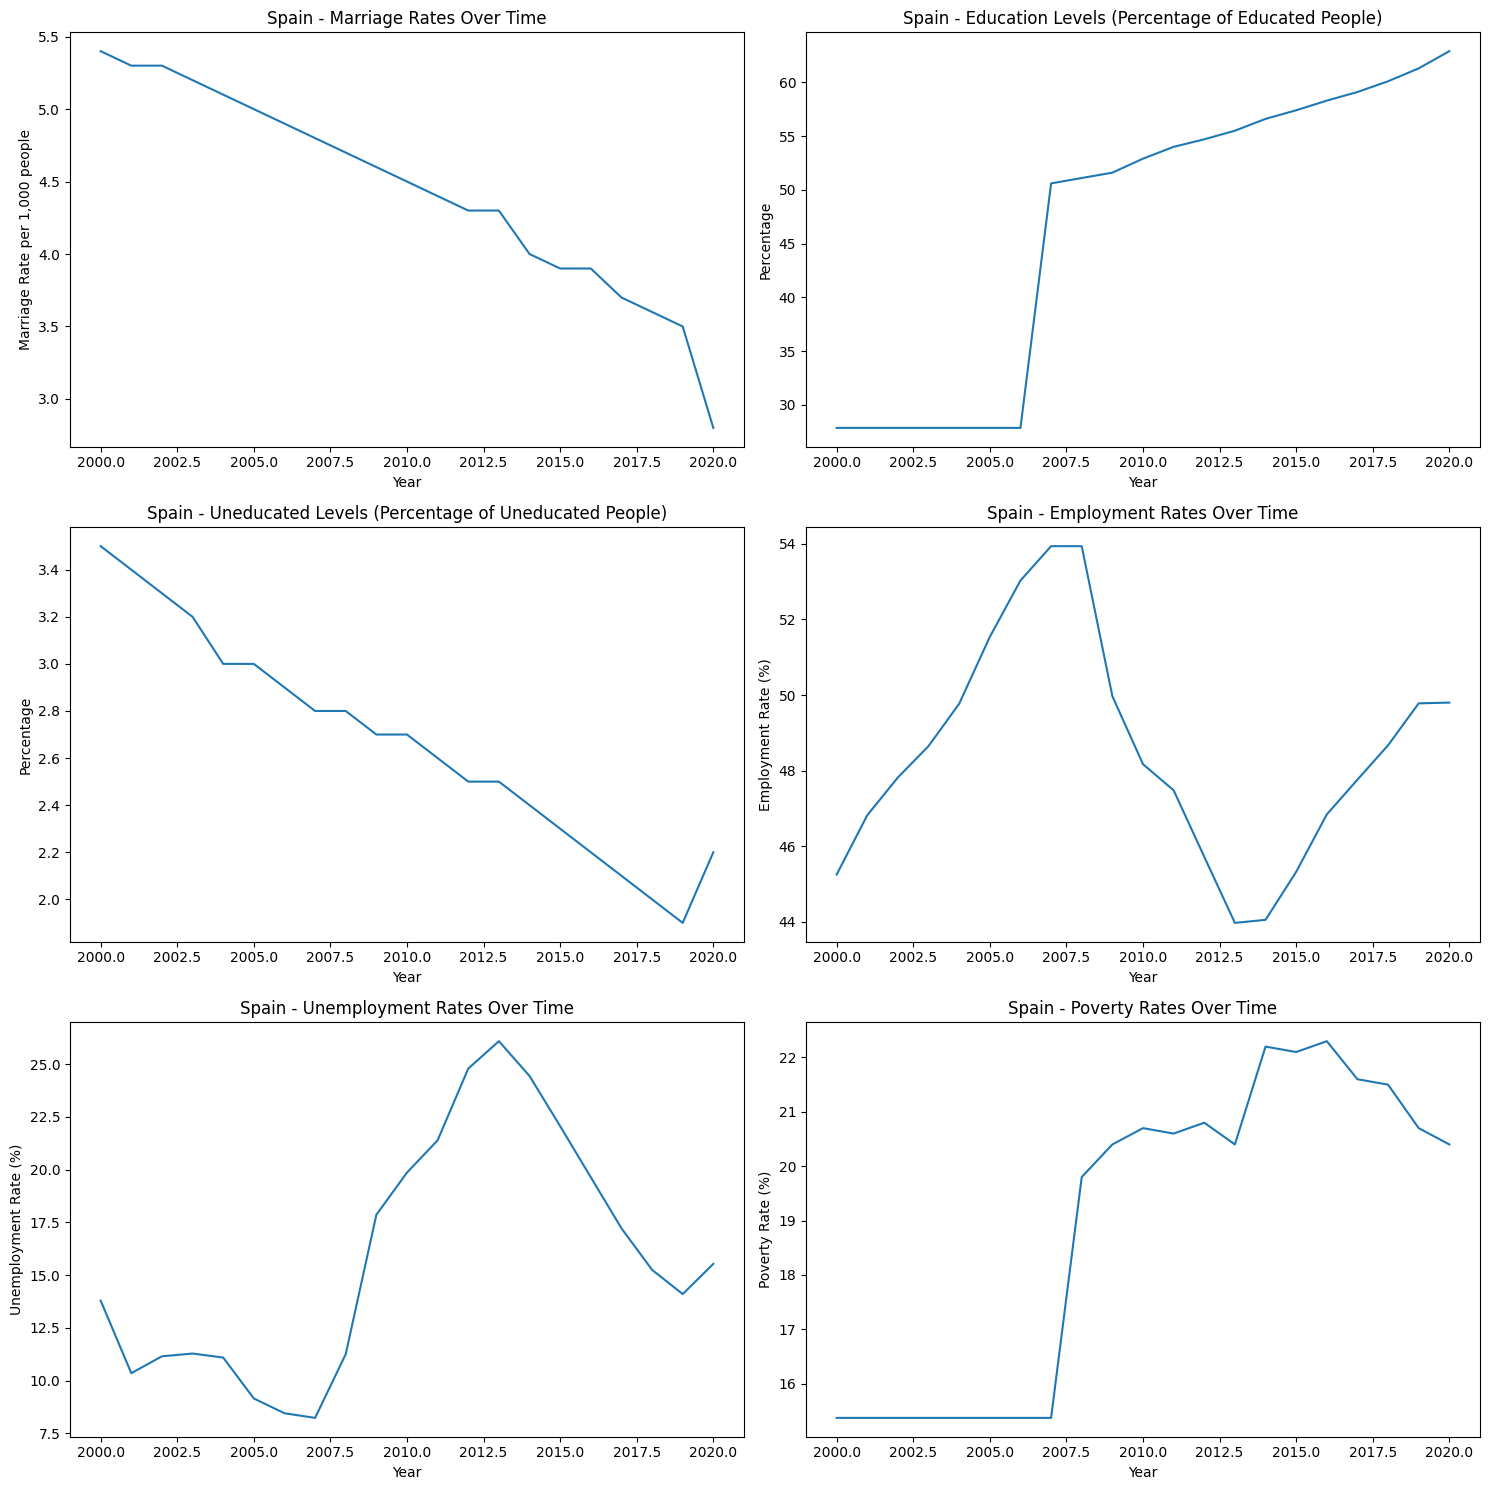

Statistics for Spain:
       Married(per 1 thousand)  Uneducated  Educated(bachelor's)  Employment  \
count                21.000000   21.000000             21.000000    21.00000   
mean                  4.438095    2.666667             46.718280    48.49000   
std                   0.700340    0.462961             14.024450     2.93739   
min                   2.800000    1.900000             27.854839    43.97000   
25%                   3.900000    2.300000             27.854839    46.82000   
50%                   4.500000    2.700000             52.900000    48.17000   
75%                   5.000000    3.000000             57.400000    49.80000   
max                   5.400000    3.500000             62.900000    53.94000   

       Unemployment  Poverty Rate  
count     21.000000     21.000000  
mean      15.855714     18.878882  
std        5.686435      2.889484  
min        8.230000     15.369565  
25%       11.150000     15.369565  
50%       15.250000     20.400000  
75%  

In [ ]:


countries = data.index.get_level_values('Country').unique()
for country in countries:
    stats = country_stats(country)
    print(f"Statistics for {country}:")
    print(stats)
    print("\n")

In [ ]:
def country_correlation(country):
    country_data = data.xs(country, level='Country')


    corr_matrix = country_data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix for {country}")
    plt.show()

    return corr_matrix

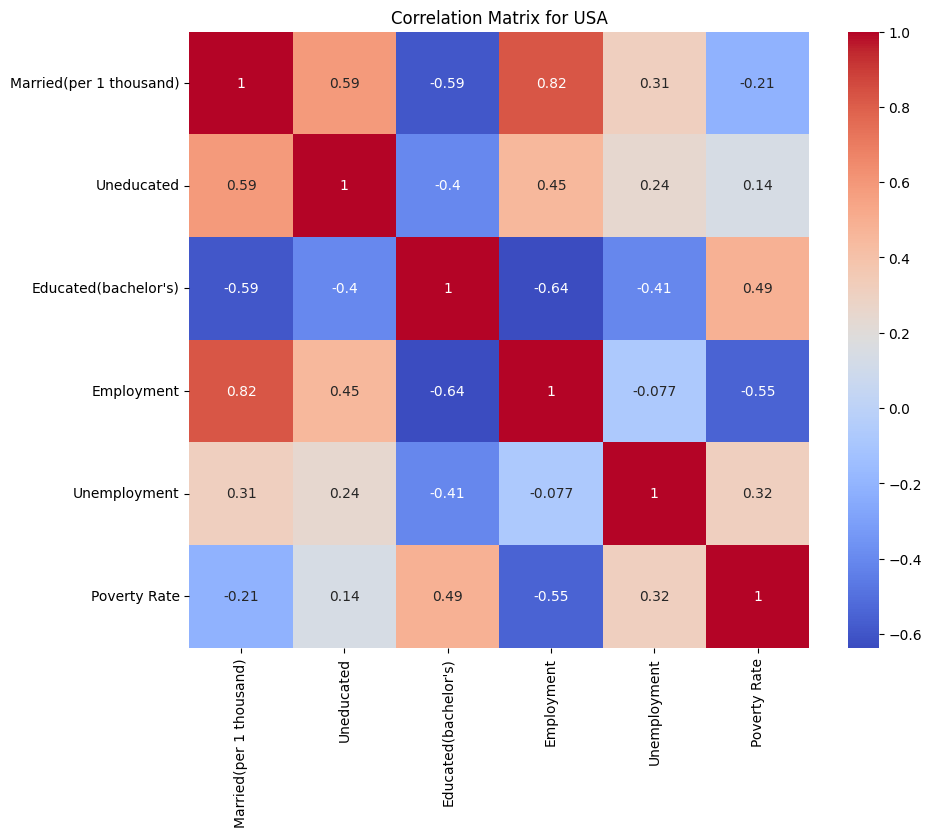

Correlation matrix for USA:
                         Married(per 1 thousand)  Uneducated  \
Married(per 1 thousand)                 1.000000    0.589317   
Uneducated                              0.589317    1.000000   
Educated(bachelor's)                   -0.594446   -0.401189   
Employment                              0.824190    0.450568   
Unemployment                            0.313703    0.242971   
Poverty Rate                           -0.208290    0.142420   

                         Educated(bachelor's)  Employment  Unemployment  \
Married(per 1 thousand)             -0.594446    0.824190      0.313703   
Uneducated                          -0.401189    0.450568      0.242971   
Educated(bachelor's)                 1.000000   -0.636583     -0.407954   
Employment                          -0.636583    1.000000     -0.077416   
Unemployment                        -0.407954   -0.077416      1.000000   
Poverty Rate                         0.488146   -0.550193      0.315479  

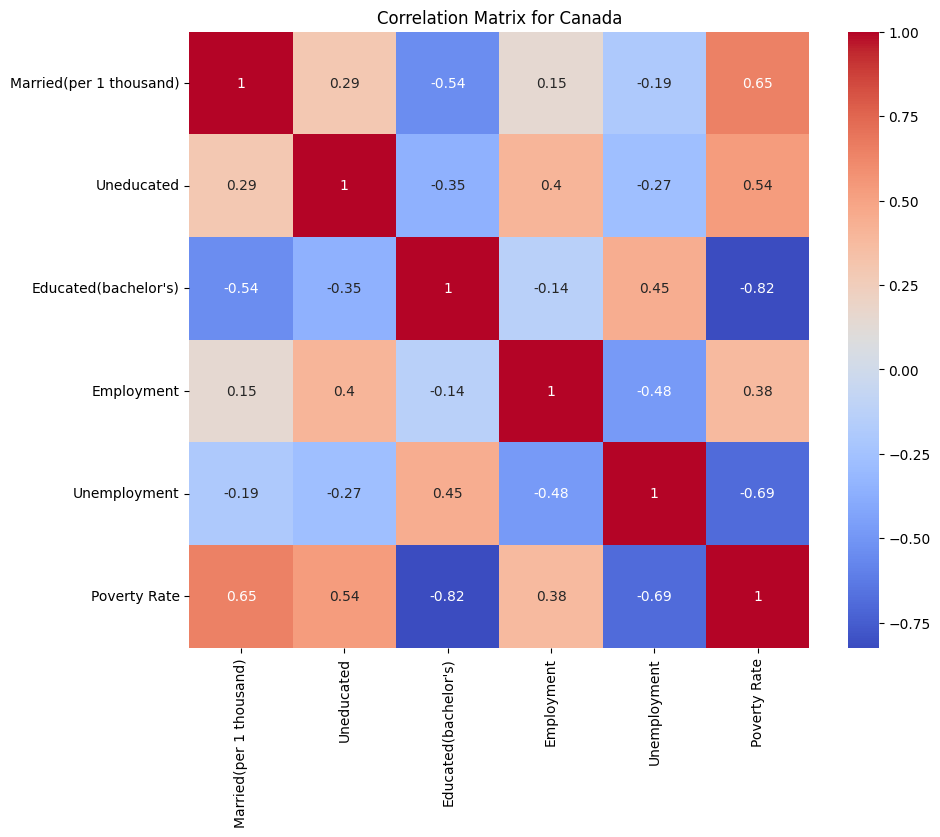

Correlation matrix for Canada:
                         Married(per 1 thousand)  Uneducated  \
Married(per 1 thousand)                 1.000000    0.292800   
Uneducated                              0.292800    1.000000   
Educated(bachelor's)                   -0.543087   -0.354639   
Employment                              0.149471    0.403727   
Unemployment                           -0.193752   -0.270894   
Poverty Rate                            0.648262    0.535754   

                         Educated(bachelor's)  Employment  Unemployment  \
Married(per 1 thousand)             -0.543087    0.149471     -0.193752   
Uneducated                          -0.354639    0.403727     -0.270894   
Educated(bachelor's)                 1.000000   -0.136753      0.450022   
Employment                          -0.136753    1.000000     -0.476102   
Unemployment                         0.450022   -0.476102      1.000000   
Poverty Rate                        -0.823860    0.378797     -0.68987

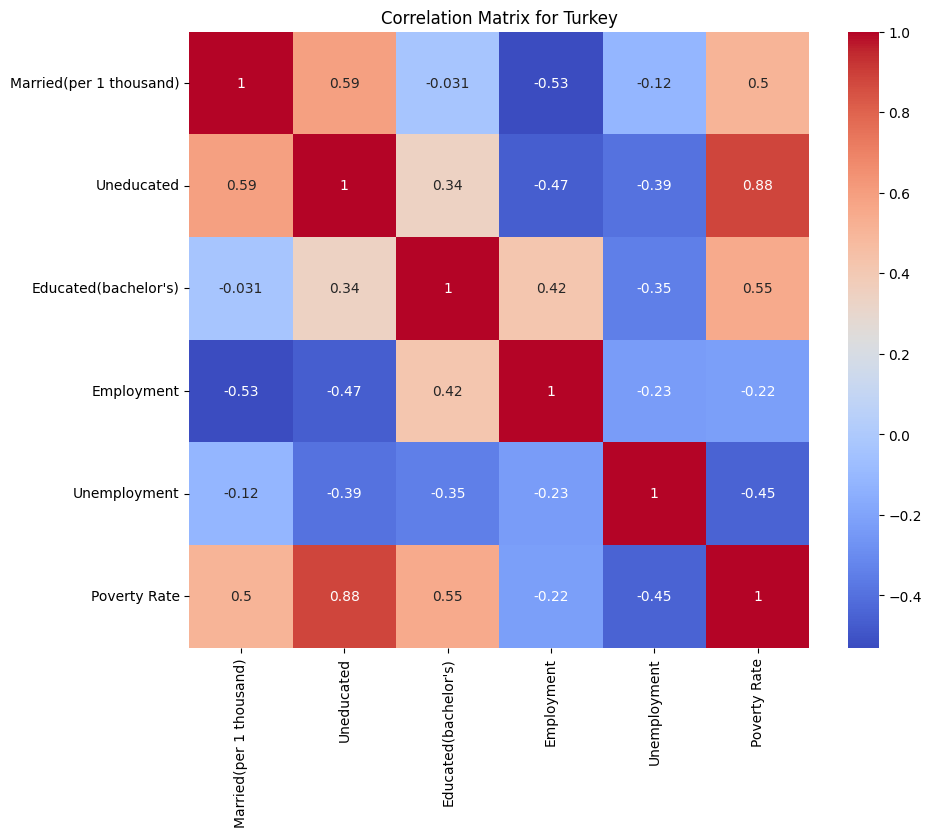

Correlation matrix for Turkey:
                         Married(per 1 thousand)  Uneducated  \
Married(per 1 thousand)                 1.000000    0.592516   
Uneducated                              0.592516    1.000000   
Educated(bachelor's)                   -0.030894    0.342044   
Employment                             -0.529761   -0.466371   
Unemployment                           -0.117330   -0.392690   
Poverty Rate                            0.504652    0.884348   

                         Educated(bachelor's)  Employment  Unemployment  \
Married(per 1 thousand)             -0.030894   -0.529761     -0.117330   
Uneducated                           0.342044   -0.466371     -0.392690   
Educated(bachelor's)                 1.000000    0.419550     -0.346489   
Employment                           0.419550    1.000000     -0.230984   
Unemployment                        -0.346489   -0.230984      1.000000   
Poverty Rate                         0.549385   -0.222518     -0.44830

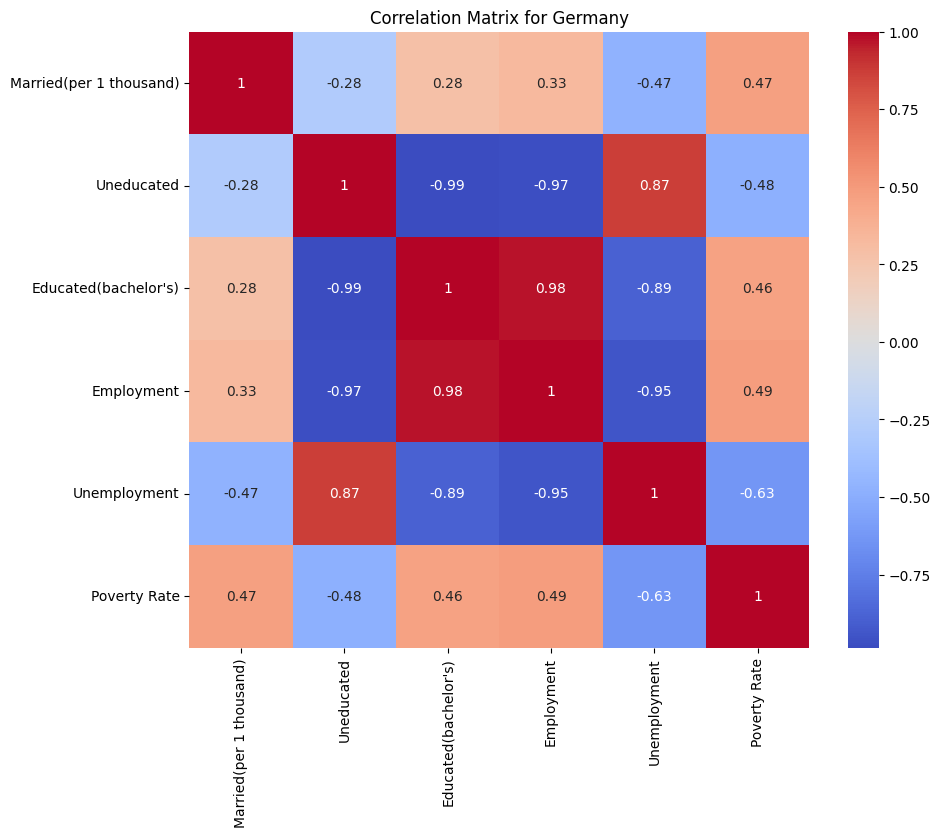

Correlation matrix for Germany:
                         Married(per 1 thousand)  Uneducated  \
Married(per 1 thousand)                 1.000000   -0.280692   
Uneducated                             -0.280692    1.000000   
Educated(bachelor's)                    0.279904   -0.985467   
Employment                              0.331099   -0.974267   
Unemployment                           -0.468774    0.873893   
Poverty Rate                            0.466111   -0.483166   

                         Educated(bachelor's)  Employment  Unemployment  \
Married(per 1 thousand)              0.279904    0.331099     -0.468774   
Uneducated                          -0.985467   -0.974267      0.873893   
Educated(bachelor's)                 1.000000    0.975534     -0.889856   
Employment                           0.975534    1.000000     -0.946670   
Unemployment                        -0.889856   -0.946670      1.000000   
Poverty Rate                         0.464426    0.486054     -0.6292

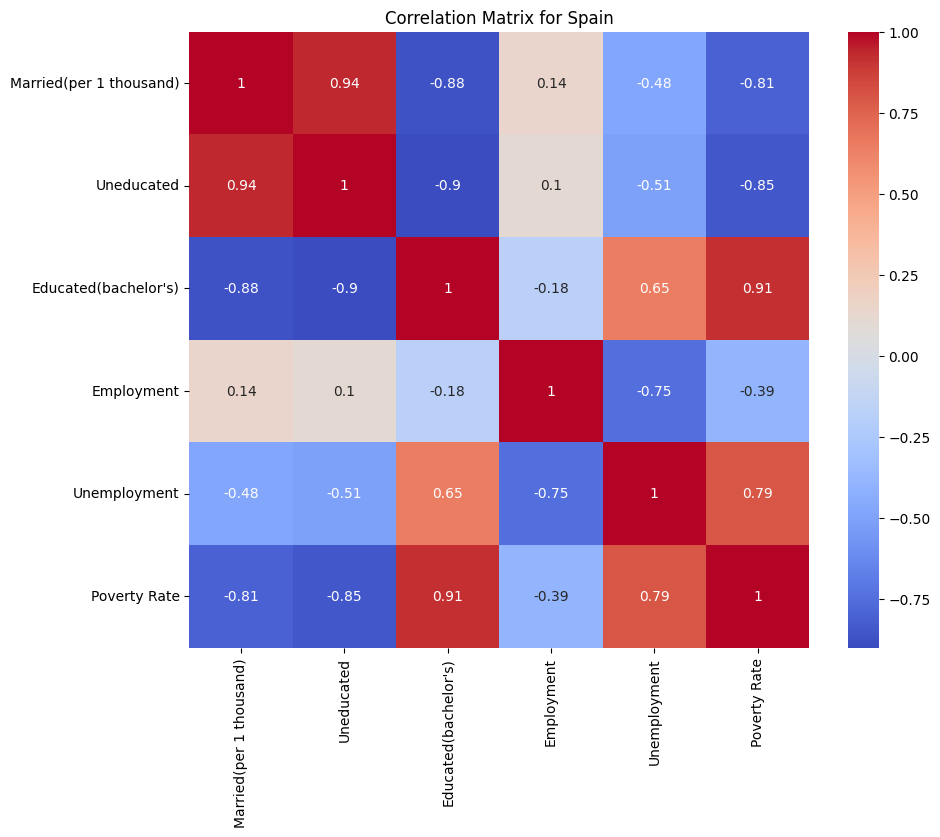

Correlation matrix for Spain:
                         Married(per 1 thousand)  Uneducated  \
Married(per 1 thousand)                 1.000000    0.935549   
Uneducated                              0.935549    1.000000   
Educated(bachelor's)                   -0.878388   -0.900776   
Employment                              0.142963    0.103795   
Unemployment                           -0.481157   -0.511414   
Poverty Rate                           -0.806960   -0.849629   

                         Educated(bachelor's)  Employment  Unemployment  \
Married(per 1 thousand)             -0.878388    0.142963     -0.481157   
Uneducated                          -0.900776    0.103795     -0.511414   
Educated(bachelor's)                 1.000000   -0.178929      0.647703   
Employment                          -0.178929    1.000000     -0.752133   
Unemployment                         0.647703   -0.752133      1.000000   
Poverty Rate                         0.913658   -0.390301      0.792340

In [ ]:
countries = data.index.get_level_values('Country').unique()

for country in countries:
    corr_matrix = country_correlation(country)
    print(f"Correlation matrix for {country}:")
    print(corr_matrix)
    print("\n")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

def country_linear_regression(country):
    country_data = data.xs(country, level='Country')


    X = country_data.drop(columns=['Poverty Rate'])
    y = country_data['Poverty Rate']

    X_train, y_train = X, y


    model = LinearRegression()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_train)


    mape = mean_absolute_percentage_error(y_train, y_pred)


    next_year = 2021
    next_year_data = X.iloc[-1:].copy()
    next_year_data.index = pd.MultiIndex.from_tuples([(next_year, country)], names=['Year', 'Country'])
    next_year_pred = model.predict(next_year_data)[0]


    print(f"Linear Regression Results for {country}:")
    print(f"MAPE: {mape}")
    print(f"Prediction for {next_year}: {next_year_pred}")
    print("\n")


    plt.figure(figsize=(10, 6))
    plt.plot(y_train.index, y_train, label='Actual')
    plt.plot(y_train.index, y_pred, label='Predicted')
    plt.axvline(x=next_year-1, color='r', linestyle='--', label=f'Prediction for {next_year}')
    plt.scatter(next_year, next_year_pred, color='red')
    plt.title(f'Linear Regression for {country}')
    plt.xlabel('Year')
    plt.ylabel('Poverty Rate')
    plt.legend()
    plt.show()


Linear Regression Results for USA:
MAPE: 0.0524324289156053
Prediction for 2021: 12.634400549047738




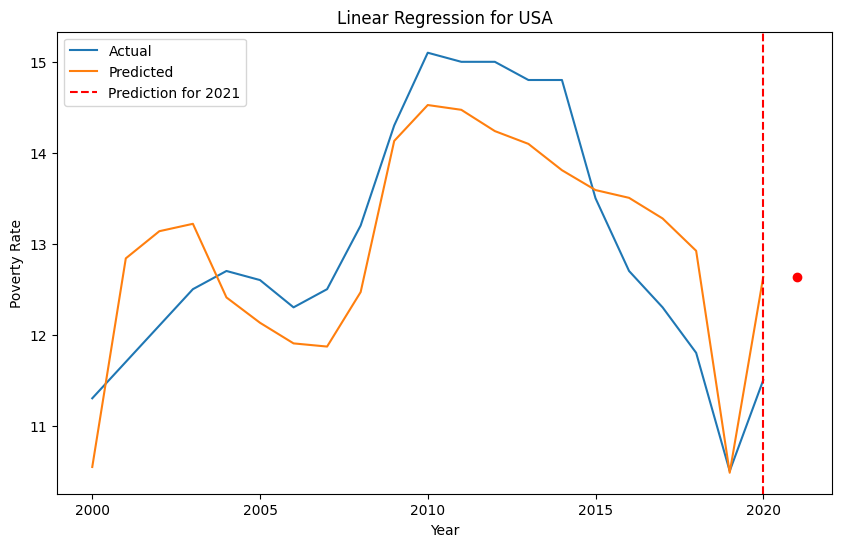

Linear Regression Results for Canada:
MAPE: 0.04519482999365392
Prediction for 2021: 7.837734027878007




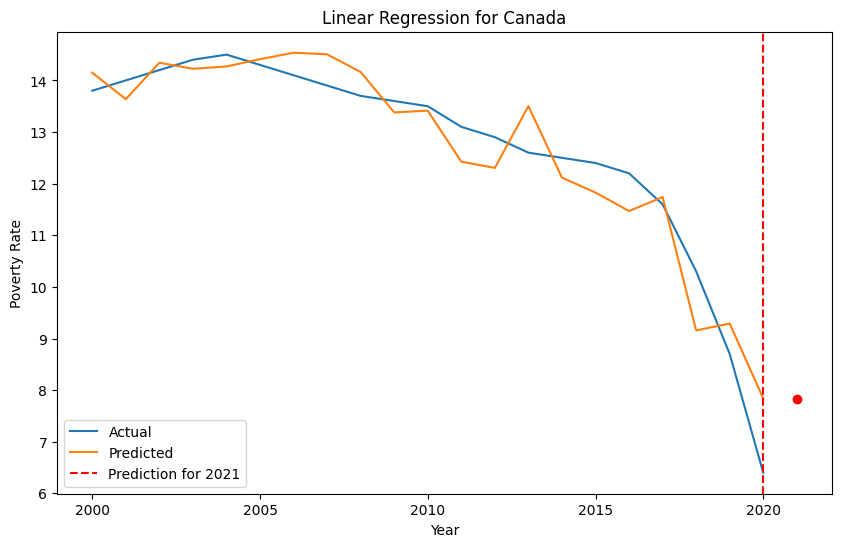

Linear Regression Results for Turkey:
MAPE: 0.09302206357310072
Prediction for 2021: 10.539810498940465




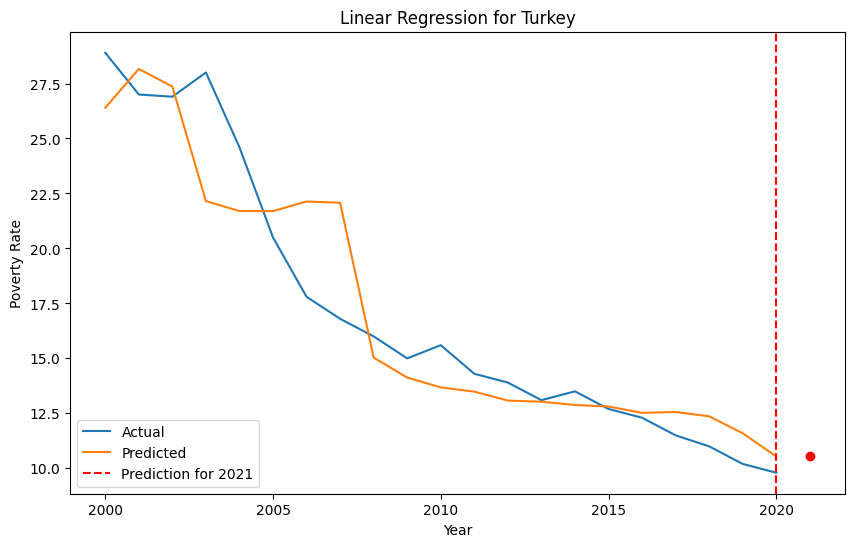

Linear Regression Results for Germany:
MAPE: 0.013493122624421932
Prediction for 2021: 16.14044977876614




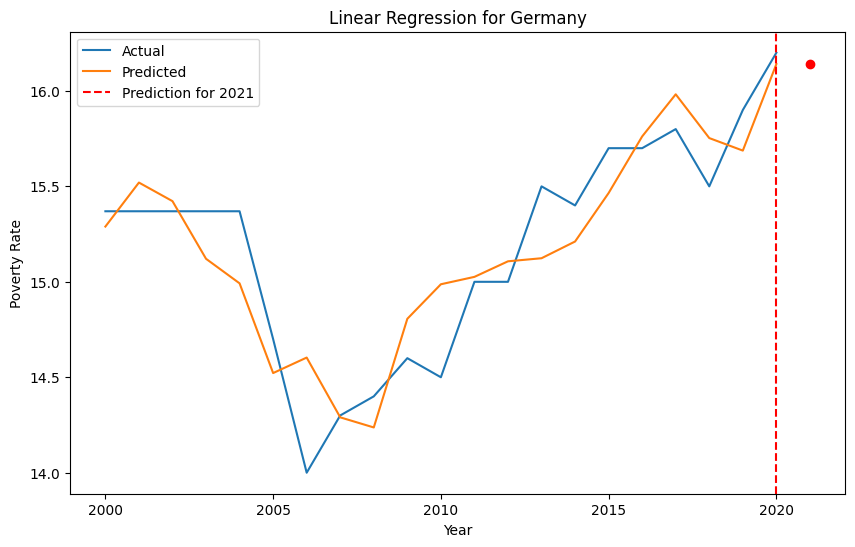

Linear Regression Results for Spain:
MAPE: 0.03036059398275635
Prediction for 2021: 20.881826103902682




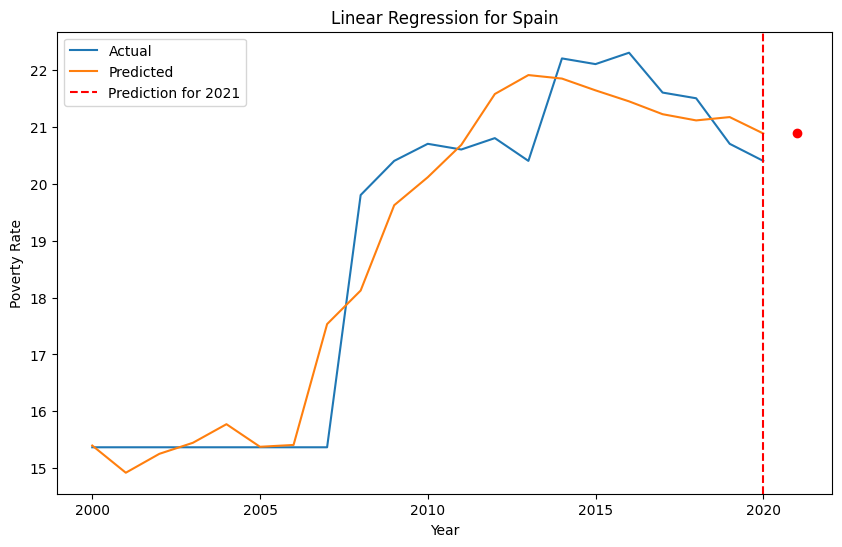

In [ ]:
countries = data.index.get_level_values('Country').unique()
for country in countries:
    country_linear_regression(country)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def classify_by_country(country_data, country_name):

    threshold = country_data['Poverty Rate'].mean()
    y = country_data['Poverty Rate'] > threshold

    X = country_data.drop(columns=['Poverty Rate'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {country_name}:", accuracy)

    print(f"Classification Report for {country_name}:")
    print(classification_report(y_test, y_pred))


In [ ]:

countries = data.index.get_level_values('Country').unique()
for country in countries:
    country_data = data.loc[data.index.get_level_values('Country') == country].reset_index(level='Country', drop=True)
    classify_by_country(country_data, country)


Accuracy for USA: 0.8
Classification Report for USA:
              precision    recall  f1-score   support

       False       0.75      1.00      0.86         3
        True       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

Accuracy for Canada: 1.0
Classification Report for Canada:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2
        True       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Accuracy for Turkey: 0.8
Classification Report for Turkey:
              precision    recall  f1-score   support

       False       0.75      1.00      0.86         3
        True       1.00      0.50      0.67         2

    accurac

In [ ]:
threshold = country_data['Poverty Rate'].mean()

def predict_for_2021(country_data, country_name):

    X = country_data.drop(columns=['Poverty Rate'])

    average_change = X.diff().mean()

    X_2021 = X.iloc[-1] + average_change

    clf = RandomForestClassifier(random_state=42)

    y = country_data['Poverty Rate'] > threshold
    clf.fit(X, y)

    y_pred_2021 = clf.predict([X_2021])

    print(f"Predicted class for {country_name} in 2021:", y_pred_2021[0])


In [ ]:
for country in countries:
    country_data = data.loc[data.index.get_level_values('Country') == country].reset_index(level='Country', drop=True)
    predict_for_2021(country_data, country)

Predicted class for USA in 2021: False
Predicted class for Canada in 2021: False
Predicted class for Turkey in 2021: False
Predicted class for Germany in 2021: False
Predicted class for Spain in 2021: True


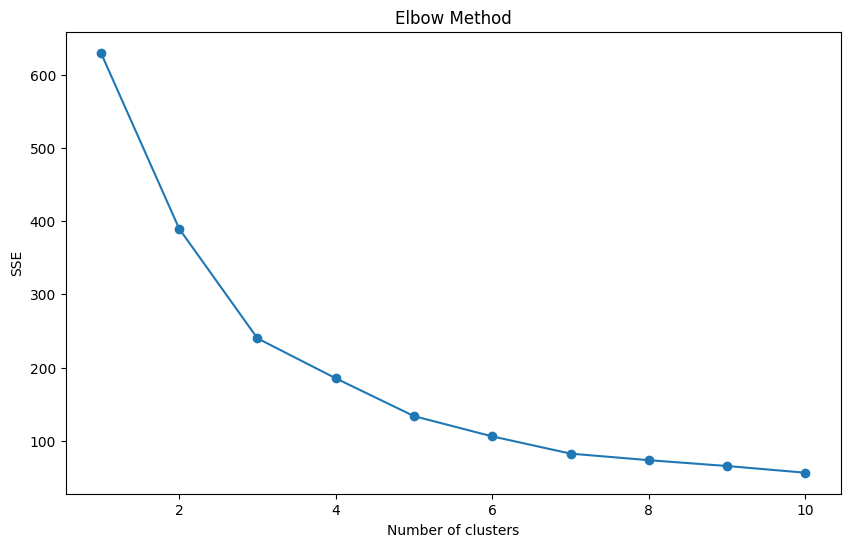

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


Cluster 0: ['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany']
Cluster 1: ['Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain'

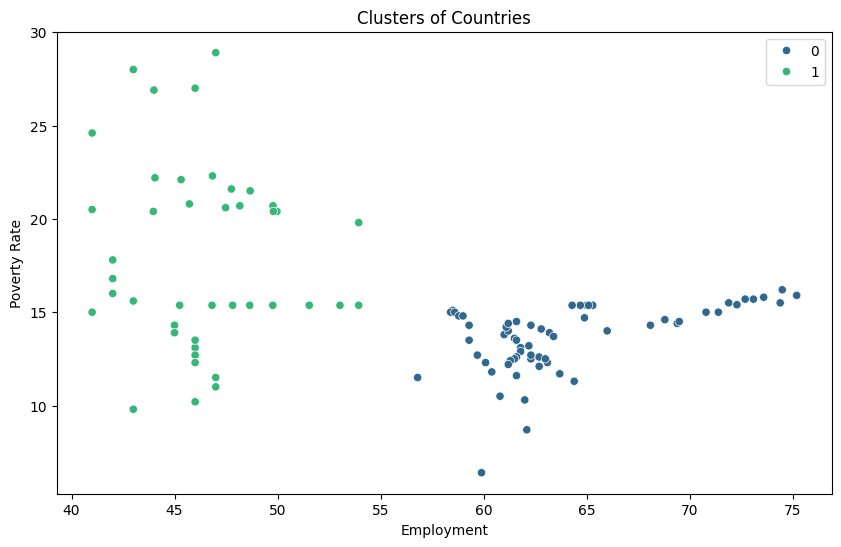

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Reset index to access country names
clustered_countries = data.reset_index()[['Country', 'Cluster']]

# Group by cluster and print countries in each cluster
cluster_groups = clustered_countries.groupby('Cluster')['Country'].apply(list)
for cluster_label, countries in cluster_groups.items():
    print(f"Cluster {cluster_label}: {countries}")

# Plotting the clusters for visualization (optional)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employment', y='Poverty Rate', hue='Cluster', data=data.reset_index(), palette='viridis')
plt.title('Clusters of Countries')
plt.xlabel('Employment')
plt.ylabel('Poverty Rate')
plt.legend()
plt.show()

